<a href="https://colab.research.google.com/github/SubbulakshmiSN/Logistic_Regression_stats_model/blob/main/Admissions_Data_Logit_sm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *`Admissions Data - Logit Model`*

# *`IMPORT LIBRARIES`*

In [35]:
import pandas as pd
import numpy as np

#Statistic
from scipy import stats

#Visualization
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

# *`READ THE DATA`*

In [57]:
df= pd.read_csv("/content/Admissions Data.csv")
df.head()

,Marks,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male


# *`DATA OBSERVATION`*

In [11]:
'''
dependency: Admitted
independent: Marks, Gender

continuous: Marks
category: Admitted, Gender

supervised learning:
since target is category, we use logistic  regression in stats models from supervised learning
'''

'\ndependency: Admitted\nindependent: Marks, Gender\n\ncontinuous: Marks\ncategory: Admitted, Gender\n\nsupervised learning: \nsince target is category, we use logistic  regression in stats models from supervised learning\n'

In [12]:
df.columns

Index(['Marks', 'Admitted', 'Gender'], dtype='object')

In [13]:
columns=[ 'Admitted', 'Gender']
for col in columns:
  print(col)
  print(df[col].unique())
  print("--------------------------------------")

Admitted
['No' 'Yes']
--------------------------------------
Gender
['Male' 'Female']
--------------------------------------


# *`DATA HANDLING`*

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Marks     168 non-null    int64 
 1   Admitted  168 non-null    object
 2   Gender    168 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.1+ KB


In [15]:
'''
no null values
'''
df.isnull().sum()

Marks       0
Admitted    0
Gender      0
dtype: int64

# *`DATA VISUALIZATION`*

In [18]:
fig = px.sunburst(df,path=['Gender', 'Admitted'],
                   color='Admitted',
                   values='Marks')
fig.show()

# *`DATA PREPROCESSING`*

In [58]:
#Replacing categorical data with numerical data
df.Admitted = df.Admitted.map({'Yes':1,'No':0})
df.Gender = df.Gender.map({'Female':11,'Male':12})
df.head()

,Marks,Admitted,Gender
0,1363,0,12
1,1792,1,11
2,1954,1,11
3,1653,0,12
4,1593,0,12


# *`MACHINE LEARNING`*

In [43]:
#seperating the data
X = df.drop('Admitted',axis=1)
y = df['Admitted']

x1=sm.add_constant(X)
result = sm.Logit(y,x1).fit()
result.pred_table()


Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


array([[69.,  5.],
       [ 4., 90.]])

In [29]:
#Evaluation
cm_df=pd.DataFrame(result.pred_table(),columns=["Predicted 0","Predicted 1"],index=["Actual 0","Actual 1"])
cm_df

,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


In [31]:
cm= np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
print ('Accuracy of the model :', accuracy_train * 100)

Accuracy of the model : 94.64285714285714


In [33]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Mon, 08 Apr 2024   Pseudo R-squ.:                  0.8249
Time:                        10:28:42   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -45.0102     17.696     -2.543      0.011     -79.694     -10.326
Marks          0.0406      0.010      4.129      0.000       0.021       0.060
Gender        -1.9449      0.846     -2.299      0.022      -3.603      -0.287
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

# *`FOR UNDERSTANDING THE LOGISTIC REGRESSION`*

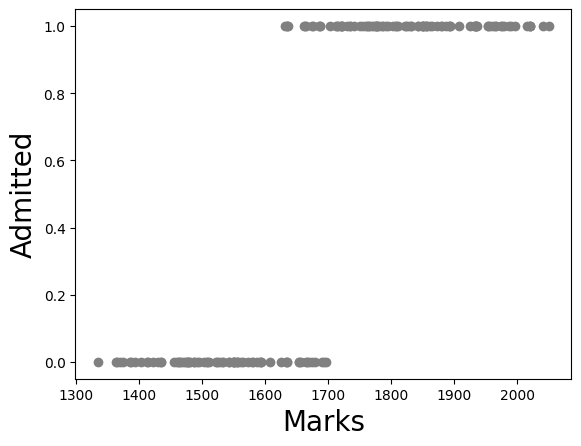

In [59]:
y=df["Admitted"]
x1=df["Marks"]

plt.scatter(x1,y,color="grey")
plt.xlabel("Marks",fontsize=20)
plt.ylabel("Admitted",fontsize=20)
plt.show()

In [60]:
x=sm.add_constant(x1)

In [61]:
result_log = sm.Logit(y,x).fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


In [62]:
def myfun(x,b0,b1):
  return np.array(np.exp(b0+b1*x)/(1+np.exp(b0+b1*x)))

In [63]:
yhat=np.sort(myfun(x1,result_log.params[0],result_log.params[1]))
x_=np.sort(np.array(x1))

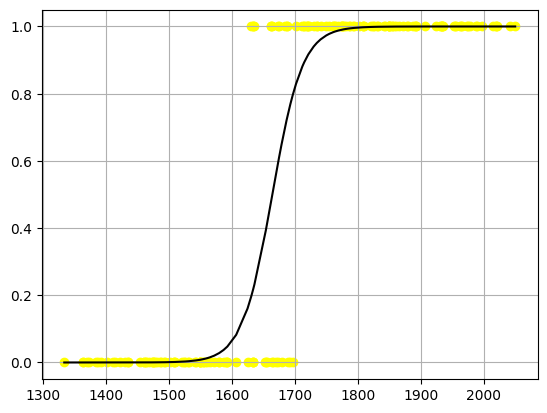

In [67]:
plt.scatter(x1,y, color="yellow")   # Note : Only For Understanding
plt.plot(x_,yhat, color="black")
plt.grid()
plt.show()